In [1]:
import pandas as pd
import numpy as np
from collections import defaultdict
from matplotlib import pyplot as plt

### CREATE AGG MATRIX AND READ DATA

In [2]:
data = pd.read_csv("data.csv", index_col=0) 
agg_mat_df = pd.read_csv("agg_mat.csv", index_col=0) # matrix of aggregated data with bottom time series
level0total = 1
level1total = 2
level2total = 4
level3total = 200

In [3]:
data

,Total,y1,y2,y11,y12,y21,y22,Bottom1,Bottom2,Bottom3,...,Bottom191,Bottom192,Bottom193,Bottom194,Bottom195,Bottom196,Bottom197,Bottom198,Bottom199,Bottom200
2008-01-01,1536.0182,757.3218,778.6964,360.5690,396.7528,410.6807,368.0157,8.1370,2.1910,4.7163,...,5.5609,5.2466,9.3058,8.7667,5.8731,11.3673,8.8627,8.1654,6.5542,8.5484
2008-01-02,1619.2435,790.8156,828.4279,389.4334,401.3822,431.6908,396.7371,8.9488,8.1517,4.8137,...,5.3390,5.3748,9.7310,12.0854,5.9546,11.8716,9.1413,8.2749,7.9835,7.4303
2008-01-03,1423.6574,684.3216,739.3358,329.0994,355.2222,387.1702,352.1656,8.1359,4.7902,4.6435,...,5.1115,5.1326,9.6746,8.9663,6.1468,9.7029,8.5609,7.8705,6.2287,6.7340
2008-01-04,1096.3325,529.1279,567.2046,249.3346,279.7933,296.2565,270.9481,6.4700,1.5121,3.2586,...,2.9545,3.8832,6.7228,6.5009,4.7770,7.6188,7.4227,5.5232,4.8793,5.8216
2008-01-05,974.5526,475.1733,499.3793,231.4860,243.6873,264.9305,234.4488,5.5741,1.4916,2.9172,...,2.5862,3.6739,5.5844,5.7266,4.0254,6.4069,6.9933,5.1315,4.0133,5.2404
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2008-12-27,1606.0017,801.1668,804.8349,423.0887,378.0781,408.4916,396.3433,7.7495,9.0067,7.4960,...,11.3703,7.0951,5.6765,6.8699,5.4110,8.9070,4.3274,2.6546,12.9457,13.0458
2008-12-28,1567.3015,779.7629,787.5386,413.3880,366.3749,395.4527,392.0859,8.1097,9.2325,7.6123,...,11.0934,7.4894,7.5004,7.0521,5.5878,9.2178,4.4601,2.6299,13.1887,11.6035
2008-12-29,1722.5124,878.3538,844.1586,428.7631,449.5907,429.9540,414.2046,6.2941,5.9546,17.2047,...,12.2824,7.6019,5.7080,6.9409,8.5787,7.2745,10.6823,2.8012,14.2313,13.4012
2008-12-30,1776.7038,918.6770,858.0268,475.8637,442.8133,421.0122,437.0146,9.7905,9.3584,7.2440,...,12.1320,7.1799,6.5667,7.5545,2.8586,10.3623,8.6429,2.8779,14.2212,13.3731


In [4]:
levels_left = [0, level0total, level0total+level1total, level0total+level1total+level2total]
levels_right = [0, level1total, level1total+level2total, level1total+level2total+level3total]
nb_ts_levels = [level0total, level1total, level2total, level3total]
total_ts = [0,level0total,level0total+level1total,level0total+level1total+level2total,level0total+level1total+level2total+level3total]
lengths = nb_ts_levels

In [5]:
nodes=[[2], [2,2], [50,50,50,50]]

In [6]:
nodes_list = np.array([])
for i in range(len(nodes)):
    for j in range(len(nodes[i])):
        nodes_list = np.append(nodes_list, int(nodes[i][j]))
nodes_list = nodes_list.astype(int)
nodes_list

array([ 2,  2,  2, 50, 50, 50, 50])

In [7]:
def creat_agg_mat(nb_ts_levels, nodes_list):
    nb_total_ts = sum(nb_ts_levels)
    nb_ts_agg =sum(nb_ts_levels[:len(nb_ts_levels)-1])
    global_Matrix = pd.DataFrame(np.zeros((nb_ts_agg, nb_total_ts-1)))
    
    c = 0
    for i in range(len(nodes_list)):
        for j in range(nodes_list[i]):
            global_Matrix.iloc[i,c+j] = 1
        c += nodes_list[i]
            

    return global_Matrix

In [8]:
### create global matrix A
### create list of number of TS in each level

def matrix_per_level(global_Matrix, levels_left, levels_right, l):
    return np.array(global_Matrix.iloc[levels_left[l-1]:levels_left[l], levels_right[l-1]:levels_right[l]])

In [9]:
A = creat_agg_mat(nb_ts_levels, nodes_list)
A

,0,1,2,3,4,5,6,7,8,9,...,196,197,198,199,200,201,202,203,204,205
0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [10]:
matrix_per_level(A, levels_left, levels_right, 2)

array([[1., 1., 0., 0.],
       [0., 0., 1., 1.]])

### MODEL

In [39]:
# Split the data
### pivot data such as index is the name of columns
#data = data.pivot(index='date', columns='symbol', values='close')
pivot_df = data.T

n_ts = 207
n_timepoints = 365
n_dates = 20
input_size = n_ts*n_dates
pred_length = 7

In [40]:
def calculate_wmape(actual_values, forecasted_values):
    n = len(actual_values)
    num = np.sum(np.abs(actual_values - forecasted_values))
    den = np.sum(np.abs(actual_values))
    wmape = 100*num/den
    return wmape

In [41]:
X_train = []
y_train = []
X_test = []
y_test = []
for i in range(n_timepoints-n_dates-pred_length+1):
    X = pivot_df.iloc[:,i:i+n_dates].T.to_numpy().reshape(1,-1)
    X_train.append(X[0])
    y = pivot_df.iloc[:,i+n_dates:i+n_dates+1].T.to_numpy()
    y_train.append(y[0])

for i in range(n_timepoints-n_dates-pred_length+1, n_timepoints-n_dates+1):
    X = pivot_df.iloc[:,i:i+n_dates].T.to_numpy().reshape(1,-1)
    X_test.append(X[0])
    y = pivot_df.iloc[:,i+n_dates:i+n_dates+1].T.to_numpy()
    y_test.append(y[0])

X_train = np.array(X_train)
y_train = np.array(y_train)
X_test = np.array(X_test)
y_test = np.array(y_test)


##### First model without coherency

In [14]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from keras import Model
from keras.layers import Dense, Input, Dropout
from keras.optimizers import Adam

In [ ]:
## fix seed
keras.utils.set_random_seed(99)

# Enable eager execution
tf.config.run_functions_eagerly(True)

# Create a sequential model
inp1 = Input(shape=(input_size,))
h1_w1 = Dense(512*2*2, activation='relu')(inp1)
h2_w1  = Dense(512*2, activation='relu')(h1_w1)
h3_w1 = Dense(256*2, activation='relu')(h2_w1)
h4_w1 = Dense(256, activation='relu')(h3_w1)
out1 = Dense(199, activation='linear')(h4_w1)

mdl1 = Model(inputs=inp1, outputs=out1)

mdl1.compile(loss="mse", optimizer='adam')

best_loss = float('inf')
best_epochs = 0
best_batch_size = 0

for epochs in [100, 150, 200]:
    for batch_size in [16, 32, 64]:
        history = mdl1.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, verbose=0)
        loss = history.history['val_loss'][-1] if 'val_loss' in history.history else history.history['loss'][-1]
        
        if loss < best_loss:
            best_loss = loss
            best_epochs = epochs
            best_batch_size = batch_size

print("Best configuration - Epochs:", best_epochs, "Batch Size:", best_batch_size)

In [42]:
best_epochs = 200
best_batch_size = 64

## fix seed
keras.utils.set_random_seed(99)

# Enable eager execution
tf.config.run_functions_eagerly(True)

# Create a sequential model
inp1 = Input(shape=(input_size,))
h1_w1 = Dense(512*4, activation='relu')(inp1)
h2_w1  = Dense(512*2, activation='relu')(h1_w1)
h3_w1 = Dense(256*2, activation='relu')(h2_w1)
h4_w1 = Dense(256, activation='relu')(h3_w1)
out1 = Dense(207, activation='linear')(h4_w1)

mdl1 = Model(inputs=inp1, outputs=out1)

mdl1.compile(loss="mse", optimizer='adam')

history1 = mdl1.fit(X_train, y_train, epochs=best_epochs, batch_size=best_batch_size)

Epoch 1/200
6/6 [==============================] - 1s 83ms/step - loss: 17435.9160
Epoch 2/200
6/6 [==============================] - 1s 85ms/step - loss: 4173.6440
Epoch 3/200
6/6 [==============================] - 0s 79ms/step - loss: 1271.8783
Epoch 4/200
6/6 [==============================] - 0s 79ms/step - loss: 1055.4203
Epoch 5/200
6/6 [==============================] - 0s 76ms/step - loss: 656.9713
Epoch 6/200
6/6 [==============================] - 0s 80ms/step - loss: 500.8361
Epoch 7/200
6/6 [==============================] - 0s 77ms/step - loss: 493.3472
Epoch 8/200
6/6 [==============================] - 1s 85ms/step - loss: 367.5437
Epoch 9/200
6/6 [==============================] - 1s 92ms/step - loss: 264.1004
Epoch 10/200
6/6 [==============================] - 0s 76ms/step - loss: 257.7364
Epoch 11/200
6/6 [==============================] - 0s 80ms/step - loss: 195.4594
Epoch 12/200
6/6 [==============================] - 0s 78ms/step - loss: 175.5759
Epoch 13/200
6/6 [==

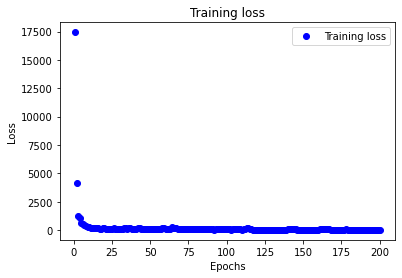

In [43]:
history_dict = history1.history
history_dict.keys()
loss_values = history_dict["loss"]
#val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
#plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

In [44]:
y_predict = np.array(mdl1.predict(X_test))#.reshape(-1)
calculate_wmape(y_test, y_predict)

1/1 [==============================] - 0s 28ms/step


8.22098578853401

#### MODEL FOR HIERARCHICAL TIME SERIES

In [45]:
def reshape_weights(weight, lengths):
    start_idx = 0
    result = []
    for length in lengths:
        sub_array = weight[start_idx:start_idx + length]
        result.append(sub_array)
        start_idx += length

    result = np.array(result)
    return result

In [46]:
# Define your custom loss function
def custom_loss_with_regularization(reg_weight, weight_matrix, lengths, A, levels_left, levels_right):
    def loss(y_true, y_pred):
        mse_loss = keras.losses.mean_squared_error(y_true, y_pred)  # MSE loss
        
        def loss_up(weight_matrix):
            weights_list = weight_matrix
            n, m = weights_list.shape
            regularization_loss = 0

            for i in range(n):
                w = reshape_weights(weights_list[i], lengths)
                for l in range(len(w) - 1):
                    mat_agg = matrix_per_level(A, levels_left, levels_right, l + 1)
                    mat_agg = tf.convert_to_tensor(mat_agg, dtype=tf.float32)  # Convert to TensorFlow tensor
                    w_l = w[l]
                    w_l2 = w[l + 1]
                    w_l_expanded = tf.expand_dims(w_l, axis=0)
                    w_l2_expanded = tf.expand_dims(w_l2, axis=-1)
                    regularization_loss += tf.reduce_sum(w_l_expanded - tf.transpose(tf.matmul(mat_agg, w_l2_expanded)))
            
            return regularization_loss
        
        custom_reg_loss = loss_up(weight_matrix)
        total_loss = mse_loss + reg_weight * custom_reg_loss 
        return total_loss
    
    return loss

In [ ]:
# Assuming you have X_train and y_train
# Assuming you have lengths, A, levels_left, and levels_right defined

## fix seed
keras.utils.set_random_seed(99)

# Enable eager execution
tf.config.run_functions_eagerly(True)

layer = 5


# Create a sequential model
inp = Input(shape=(input_size,))
h1_w1 = Dense(512*2*2, activation='relu')(inp)
h2_w1  = Dense(512*2, activation='relu')(h1_w1)
h3_w1 = Dense(256*2, activation='relu')(h2_w1)
h4_w1 = Dense(256, activation='relu')(h3_w1)
out = Dense(199, activation='linear')(h4_w1)



mdl = Model(inputs=inp, outputs=out)

# Compile the model with the custom loss function and an optimizer
custom_loss = custom_loss_with_regularization(0.01, mdl.layers[layer].kernel, lengths, A, levels_left, levels_right)

mdl.compile(loss=custom_loss, optimizer='adam')


best_loss = float('inf')
best_epochs = 0
best_batch_size = 0
#who reads is gay
for epochs in [100, 150, 200]:
    for batch_size in [16, 32, 64]:
        history = mdl.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, verbose=0)
        loss = history.history['val_loss'][-1] if 'val_loss' in history.history else history.history['loss'][-1]
        
        if loss < best_loss:
            best_loss = loss
            best_epochs = epochs
            best_batch_size = batch_size

print("Best configuration - Epochs:", best_epochs, "Batch Size:", best_batch_size)

c:\Users\hamza\anaconda3\lib\site-packages\tensorflow\python\autograph\impl\api.py:371: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return py_builtins.overload_of(f)(*args)


Best configuration - Epochs: 150 Batch Size: 64
Epoch 1/150
1/1 [==============================] - 2s 2s/step - loss: 189841.3594
Epoch 2/150
1/1 [==============================] - 2s 2s/step - loss: 189240.8125
Epoch 3/150
1/1 [==============================] - 2s 2s/step - loss: 188612.9219
Epoch 4/150
1/1 [==============================] - 2s 2s/step - loss: 188024.0781
Epoch 5/150
1/1 [==============================] - 2s 2s/step - loss: 187426.0156
Epoch 6/150
1/1 [==============================] - 2s 2s/step - loss: 186830.0312
Epoch 7/150
1/1 [==============================] - 2s 2s/step - loss: 186261.5938
Epoch 8/150
1/1 [==============================] - 2s 2s/step - loss: 185659.7500
Epoch 9/150
1/1 [==============================] - 2s 2s/step - loss: 185117.5312
Epoch 10/150
1/1 [==============================] - 2s 2s/step - loss: 184526.6406
Epoch 11/150
1/1 [==============================] - 2s 2s/step - loss: 183991.0000
Epoch 12/150
1/1 [==============================

In [48]:
# Assuming you have X_train and y_train
# Assuming you have lengths, A, levels_left, and levels_right defined

best_epochs = 200
best_batch_size = 64

## fix seed
keras.utils.set_random_seed(99)


layer = 5


# Create a sequential model
inp = Input(shape=(input_size,))
h1_w1 = Dense(512*4, activation='relu')(inp)
h2_w1  = Dense(512*2, activation='relu')(h1_w1)
h3_w1 = Dense(256*2, activation='relu')(h2_w1)
h4_w1 = Dense(256, activation='relu')(h3_w1)
out = Dense(207, activation='linear')(h4_w1)


mdl = Model(inputs=inp, outputs=out)

# Compile the model with the custom loss function and an optimizer
custom_loss = custom_loss_with_regularization(0.01, mdl.layers[layer].kernel, lengths, A, levels_left, levels_right)

mdl.compile(loss=custom_loss, optimizer='adam')

# Now train the model with the best configuration
history = mdl.fit(X_train, y_train, epochs=best_epochs, batch_size=best_batch_size)

Epoch 1/200


c:\Users\hamza\anaconda3\lib\site-packages\tensorflow\python\autograph\impl\api.py:371: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return py_builtins.overload_of(f)(*args)


6/6 [==============================] - 13s 2s/step - loss: 17354.1484
Epoch 2/200
6/6 [==============================] - 10s 2s/step - loss: 4016.9980
Epoch 3/200
6/6 [==============================] - 10s 2s/step - loss: 1296.1299
Epoch 4/200
6/6 [==============================] - 9s 2s/step - loss: 1071.3180
Epoch 5/200
6/6 [==============================] - 11s 2s/step - loss: 668.8987
Epoch 6/200
6/6 [==============================] - 11s 2s/step - loss: 497.7047
Epoch 7/200
6/6 [==============================] - 11s 2s/step - loss: 497.7209
Epoch 8/200
6/6 [==============================] - 9s 2s/step - loss: 365.9208
Epoch 9/200
6/6 [==============================] - 10s 2s/step - loss: 263.5145
Epoch 10/200
6/6 [==============================] - 22s 4s/step - loss: 242.4198
Epoch 11/200
6/6 [==============================] - 32s 5s/step - loss: 189.3530
Epoch 12/200
6/6 [==============================] - 19s 3s/step - loss: 170.8783
Epoch 13/200
6/6 [============================

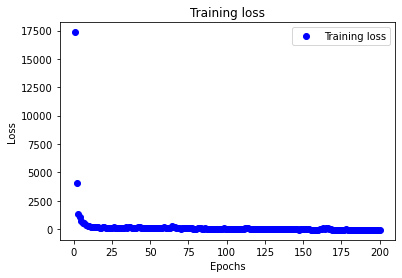

In [49]:
history_dict = history.history
history_dict.keys()
loss_values = history_dict["loss"]
#val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
#plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

In [50]:
y_predict = np.array(mdl.predict(X_test))#.reshape(-1)
calculate_wmape(y_test, y_predict)

1/1 [==============================] - 0s 51ms/step


7.9557709017785525

#### METRIC WMAPE

In [26]:
def wmape_level(actual_value, forecasted_value, total_ts, lengths):
    nb_levels = len(lengths)
    wmapes = []
    for l in range(nb_levels):
        actual_value_ts = actual_value[:, total_ts[l]:total_ts[l+1]]
        forecasted_value_ts = forecasted_value[:, total_ts[l]:total_ts[l+1]]
        wmapes.append(calculate_wmape(actual_value_ts, forecasted_value_ts))
    return wmapes

In [27]:
### w/o reco 
wmape_level(y_test, y_predict, total_ts, lengths)

[2.9791267010022917, 3.1749977081943412, 3.2940427463694375, 23.43577599856998]

In [51]:
### with reco
wmape_level(y_test, y_predict, total_ts, lengths)

[2.7006340527584745, 2.970819814396073, 3.1186610107799613, 23.0329687291797]

### METRIC RMSSE

In [28]:
### round to int value of array
def round_array(array):
    for i in range(len(array)):
        array[i] = round(array[i])
        if array[i] <= 0:
            array[i] = 0
    return array

In [29]:
### I have an array of shape (89,5)
### create dataframe with predictions
def create_df(y_predict, pred_length, data):
    ### dataframe with name of columns same as in data_for_model_000
    ### create a dataframe based on data, remove last pred_length rows, and add y_predict
    ### return dataframe
    y_predict_df = y_predict.astype(np.float32)
    y_predict_df = pd.DataFrame(y_predict_df)
    y_predict_df = y_predict_df
    df = data.copy()
    for i,col in enumerate(data.columns):
        df[col][-(pred_length):] = round_array(y_predict_df[:][i])
    return df

In [52]:
data_pred = create_df(y_predict, pred_length, data)

C:\Users\hamza\AppData\Local\Temp\ipykernel_48596\2594118051.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  array[i] = round(array[i])


In [53]:
def rmsse_ts(pred_length, data, data_pred, ts):
    H = pred_length
    T = data.shape[0] - H
    ts_array = data.iloc[:,ts].values
    ts_array_pred = data_pred.iloc[:,ts].values
    e = (1/H)*np.sum((ts_array[t] - ts_array_pred[t])**2 for t in range(T, T+H))
    e_naive = (1/(T-1))*np.sum((ts_array[t] - ts_array[t-1])**2 for t in range(1, T))
    return np.sqrt(e/e_naive)

In [54]:
def rmsse_level(pred_length, data, data_pred, total_ts, lengths):
    nb_levels = len(lengths)
    r_l = [0]*nb_levels
    for l in range(nb_levels):
        for j in range(total_ts[l], total_ts[l+1]):
            #print(l, j)
            r_l[l] += (1/lengths[l])*rmsse_ts(pred_length, data, data_pred, j)
    #print(r_l)
    R = np.mean(r_l)
    return r_l, R

In [33]:
### w/o reco
rmsse_level(pred_length, data, data_pred, total_ts, lengths)

C:\Users\hamza\AppData\Local\Temp\ipykernel_48596\821578998.py:6: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  e = (1/H)*np.sum((ts_array[t] - ts_array_pred[t])**2 for t in range(T, T+H))
C:\Users\hamza\AppData\Local\Temp\ipykernel_48596\821578998.py:7: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  e_naive = (1/(T-1))*np.sum((ts_array[t] - ts_array[t-1])**2 for t in range(1, T))


([0.19583958339202442,
  0.2146349954481625,
  0.23792780388080723,
  1.098861655168192],
 0.43681600947229654)

In [55]:
### w reco
rmsse_level(pred_length, data, data_pred, total_ts, lengths)

C:\Users\hamza\AppData\Local\Temp\ipykernel_48596\821578998.py:6: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  e = (1/H)*np.sum((ts_array[t] - ts_array_pred[t])**2 for t in range(T, T+H))
C:\Users\hamza\AppData\Local\Temp\ipykernel_48596\821578998.py:7: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  e_naive = (1/(T-1))*np.sum((ts_array[t] - ts_array[t-1])**2 for t in range(1, T))


([0.1780926207037501,
  0.19633887863962618,
  0.2205140014101296,
  1.0855012062285199],
 0.4201116767455064)